* <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

<br>

* 출처: https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

import library

In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('ggplot')

# Basic Data Science and ML Pipeline

## OSEMN Pipeline

* O - Obtaining our data
* S - Scrubbing / Cleaning our data
* E - Exploring / Visualizing our data will allow us to find patterns and trends
* M - Modeling our data will give us our predictive power as a wizard
* N - INterpreting our data   


reference : [A Beginner's Guide to the Data Science Pipeline](https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_post_details%3BmDlg5VsdSBCLBps2R0vRZA%3D%3D)


In [2]:
url = 'https://raw.githubusercontent.com/SeWonKwon/ML_training/main/Kaggle/Pima%20Indians%20Diabetes/data/diabetes.csv'
diabetes_data = pd.read_csv(url)

diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## Basic EDA and statistical anlysis

In [3]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


* describe Summary 를 보고?!
    - 25% 값이 0이거나 너무 낮은 것들... 이상치로 보인다.
    - Missing value 값을 그냥 0으로 넣은것으로 보인다. 
    - 전체적으로 Null 값이 없는 대신에 오히려 더 안좋은 결과이다. 
    - '0' 값이 유효하지 않은 값임을 나타내는 컬럼은 아래와 같다.
        1. Glucose
        2. BloodPressure
        3. SkinThinkness
        4. Insulin
        5. BMI
        6. ~Pregnancies~(임신 횟수 이기 때문에 0값이 합리적임)
       

In [5]:
(diabetes_data == 0 ).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

위의 3개 컬럼의 0 값을 null 값으로 대체해 준다. 

In [6]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

적당한 null 값의 대체 값을 찾기 위해서 원래 값의 hist 를 그려보자

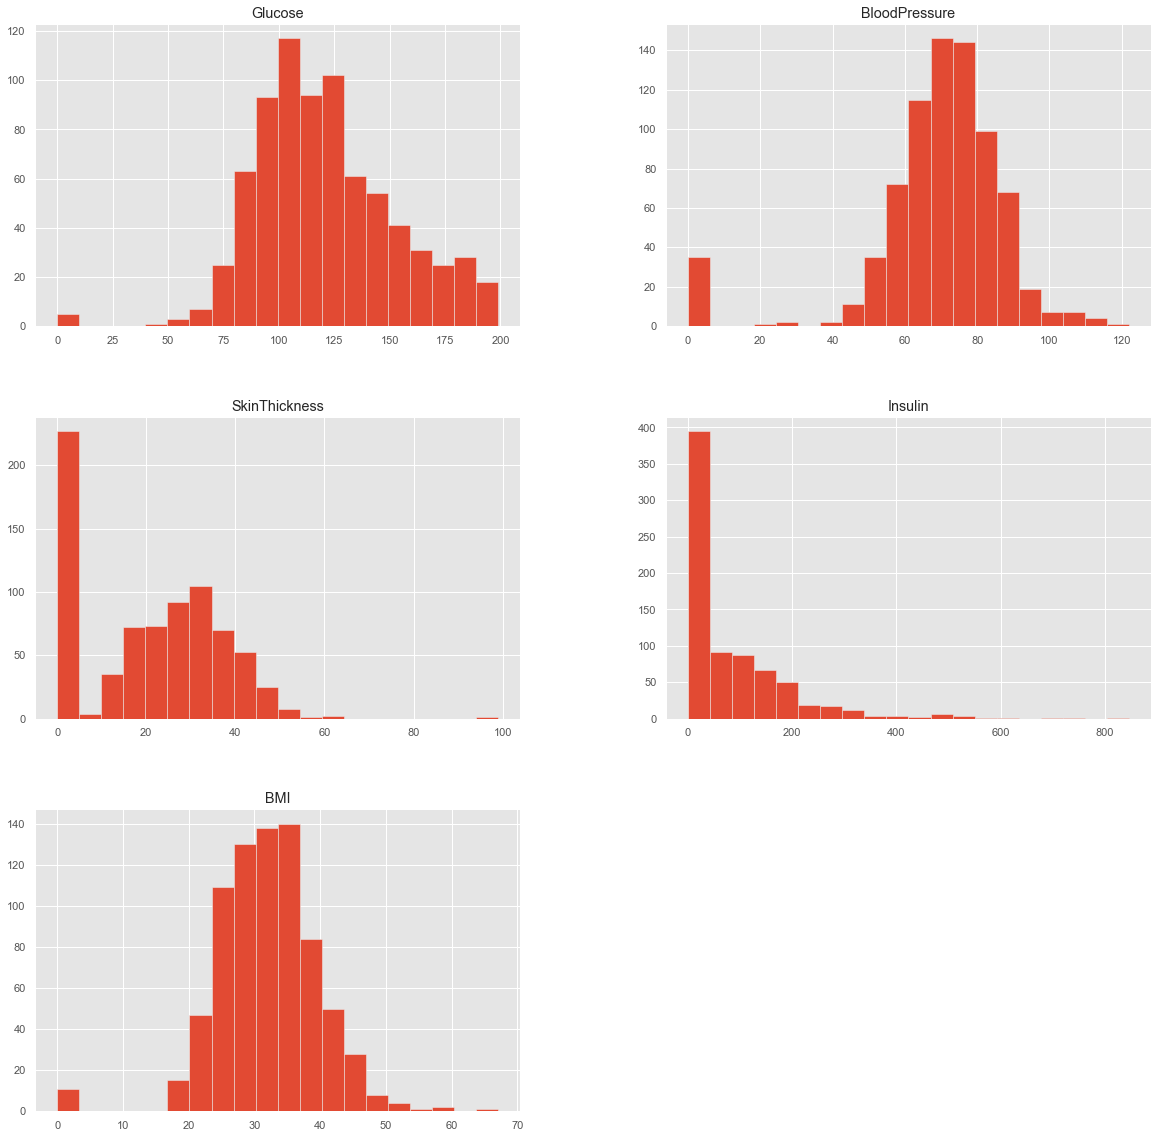

In [8]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize=(20, 20), bins=20);

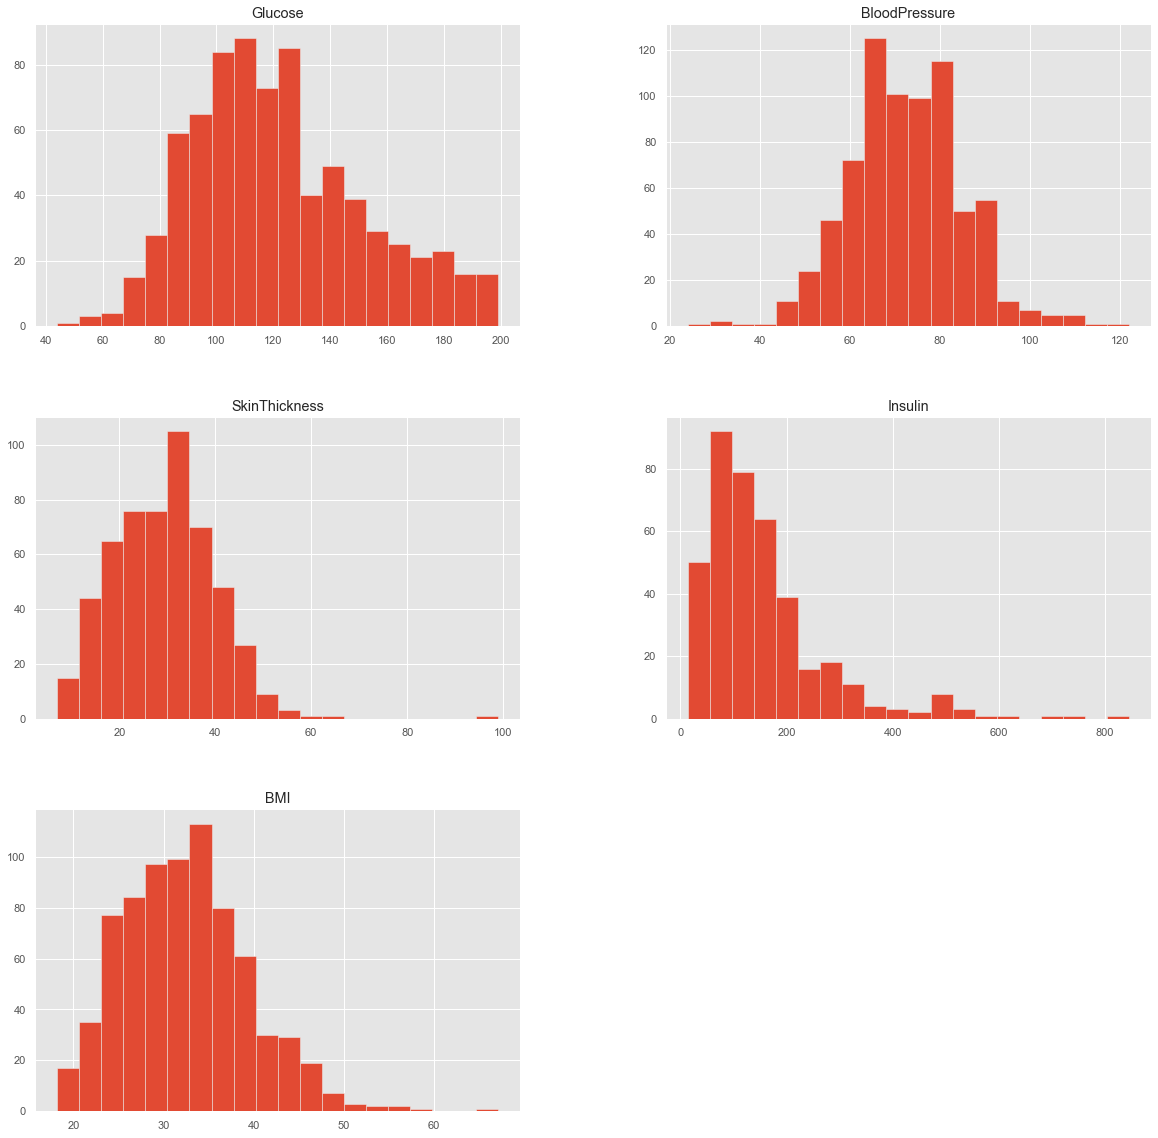

In [9]:
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize=(20, 20), bins=20);

두개의 그래프를 서로 비교해 보면 어떤 그래프가 더 알맞은 분포를 가지는 지 알 수 있다. 

In [10]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

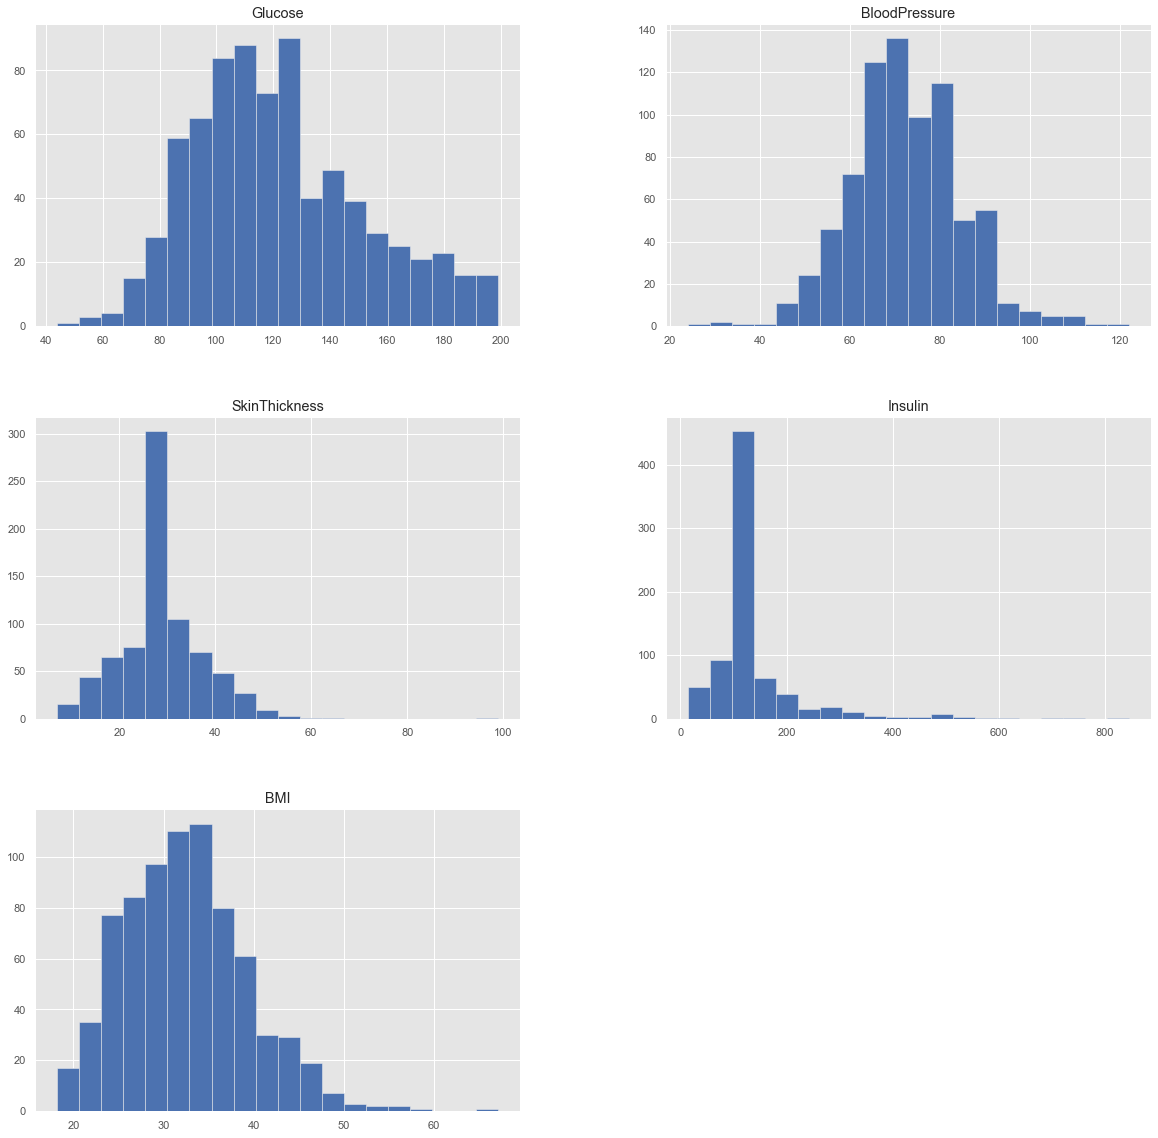

In [11]:
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize=(20, 20), bins=20, color='b');

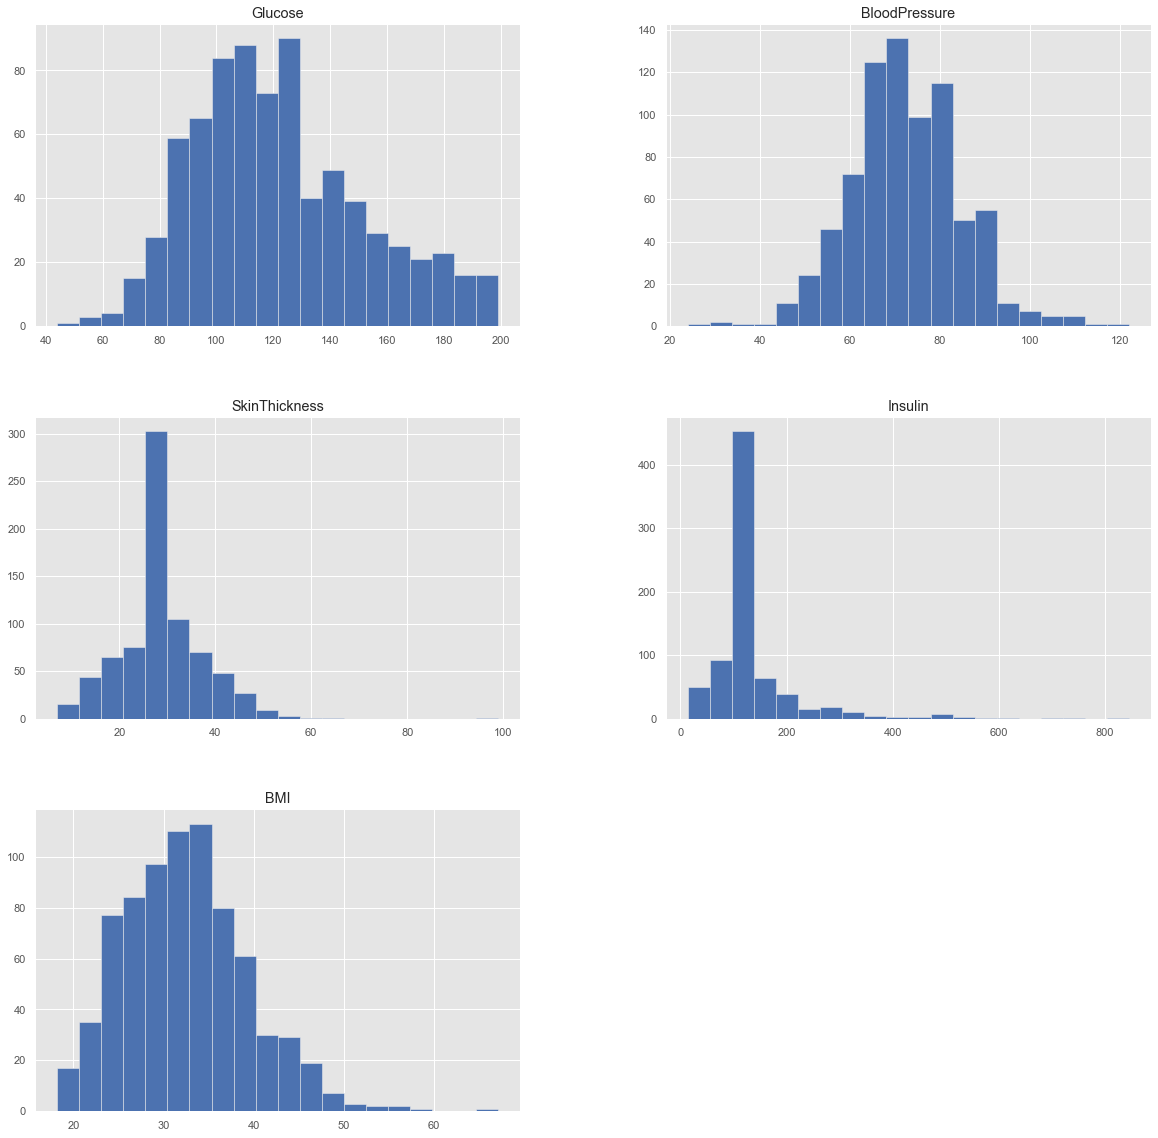

In [12]:
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize=(20, 20), bins=20, color='b',histtype='barstacked');

Skewness

![skewness](https://www.statisticshowto.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)

reference: https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/

In [13]:
dtype = diabetes_data.dtypes
dtype.value_counts()

int64      7
float64    2
dtype: int64

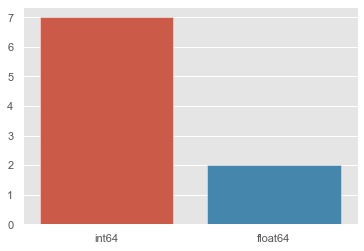

In [14]:
sns.barplot(y=dtype.value_counts(), x = ['int64','float64']);

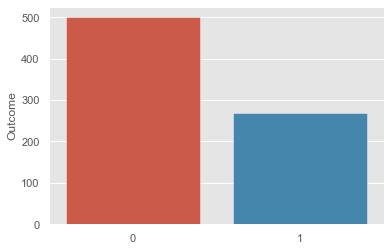

In [15]:
sns.barplot(y=diabetes_data.Outcome.value_counts(), x = ['0','1']);

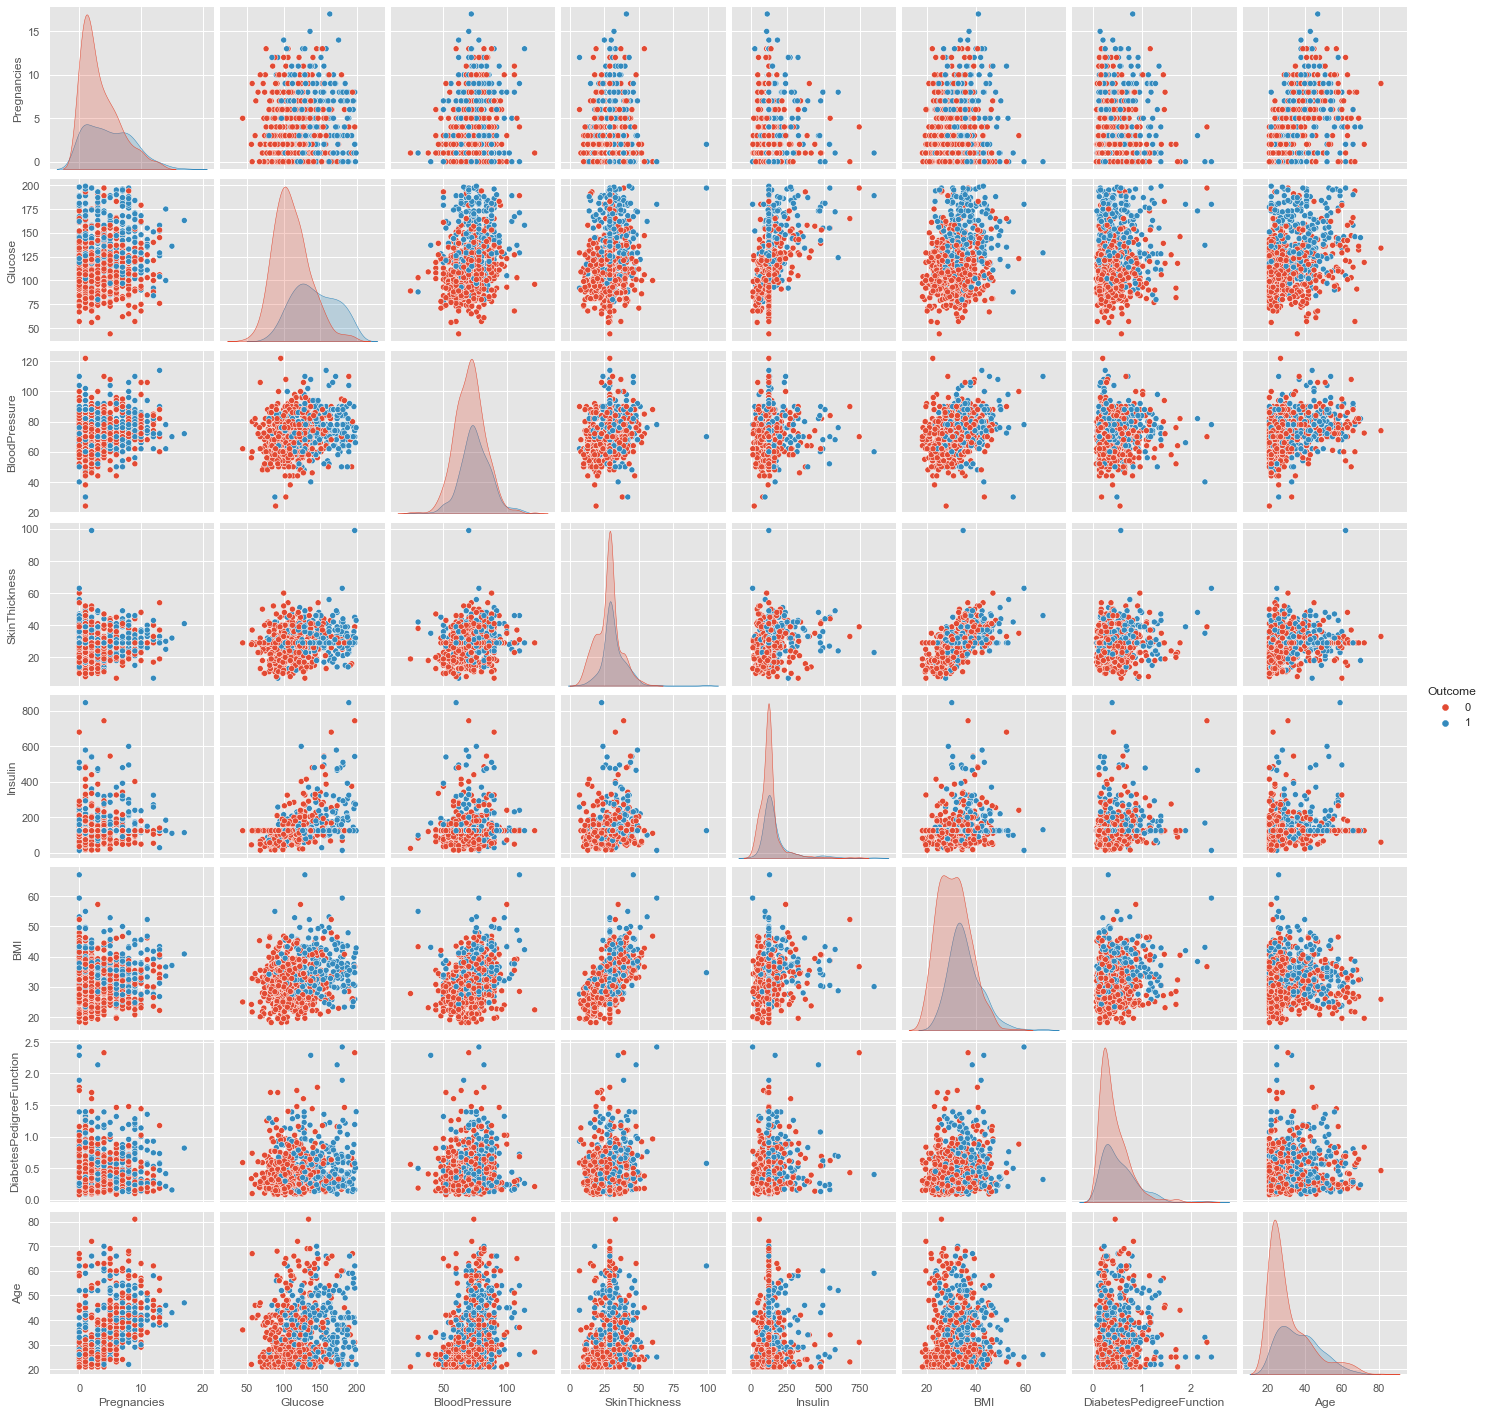

In [16]:
sns.pairplot(diabetes_data_copy, hue='Outcome');

<AxesSubplot:>

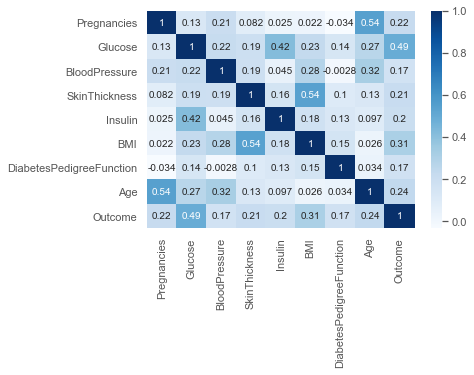

In [17]:
sns.heatmap(diabetes_data_copy.corr(), annot=True, cmap = 'Blues')

Scaling a Data~

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(diabetes_data_copy.drop('Outcome', axis=1))
y = diabetes_data_copy.Outcome

In [19]:
X

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

# 데이타 준비 및 모델 구성

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


In [21]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1, 30, 2):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

In [22]:
test_scores, train_scores

([0.6688311688311688,
  0.7402597402597403,
  0.7727272727272727,
  0.7922077922077922,
  0.7987012987012987,
  0.7857142857142857,
  0.7857142857142857,
  0.8116883116883117,
  0.8051948051948052,
  0.7922077922077922,
  0.7922077922077922,
  0.8116883116883117,
  0.8116883116883117,
  0.8116883116883117,
  0.8246753246753247],
 [1.0,
  0.8420195439739414,
  0.8273615635179153,
  0.8078175895765473,
  0.7882736156351792,
  0.7996742671009772,
  0.8061889250814332,
  0.7980456026058632,
  0.7882736156351792,
  0.7866449511400652,
  0.7768729641693811,
  0.7736156351791531,
  0.7768729641693811,
  0.7768729641693811,
  0.7719869706840391])

In [23]:
max_test_score = max(test_scores)


<AxesSubplot:>

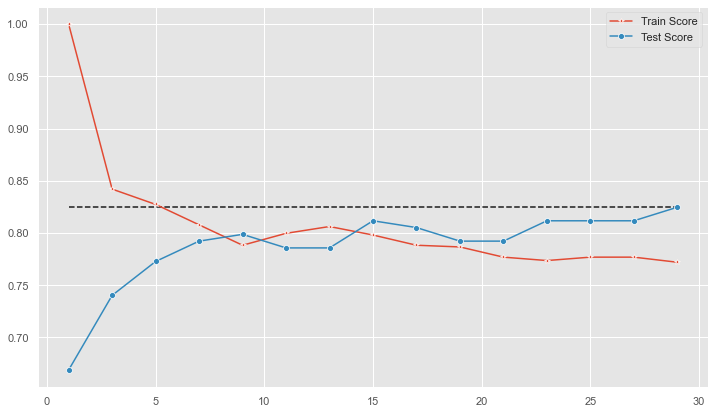

In [24]:
plt.figure(figsize=(12, 7))

plt.hlines(y=max_test_score,xmin=1, xmax=29, colors='k', linestyles='--')
sns.lineplot(range(1,30,2), train_scores, marker='*', label='Train Score')
sns.lineplot(range(1,30,2), test_scores, marker='o', label='Test Score')


값이 유동적이라 GridSearchCV로 변환해서 best 값을 구해 본다.

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [x for x in range(7,50,2)]}

gs = GridSearchCV( estimator=KNeighborsClassifier(),
                  param_grid=param_grid,
                  cv=10)

gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [7, 9, 11, 13, 15, 17, 19, 21, 23, 25,
                                         27, 29, 31, 33, 35, 37, 39, 41, 43, 45,
                                         47, 49]})

In [26]:
gs.best_params_

{'n_neighbors': 11}

In [27]:
gs.best_score_

0.7638286620835537

In [28]:
best_model = gs.best_estimator_

In [30]:
from sklearn.metrics import confusion_matrix
y_pred = best_model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)

pd.crosstab(y_test, y_pred, margins=True,
            rownames=['True'], colnames=['Predicted'])



Predicted,0,1,All
True,,,
0,87,13,100
1,20,34,54
All,107,47,154


Text(0.5, 12.5, 'Predicted label')

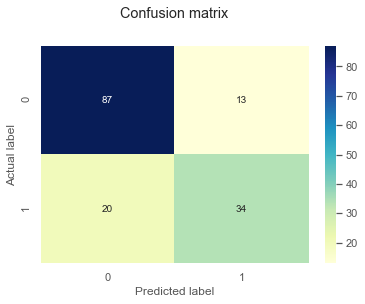

In [33]:
sns.heatmap(conf_mat, annot=True, cmap='YlGnBu', fmt='g', )
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')